# Gating of demixed protein marker levels

In [4]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from bsccm.fluorescence_processing.gating_util import ScatterSelectorGating
from bsccm import BSCCM
from pathlib import Path

bsccm = BSCCM(str(Path.home()) + '/data/BSCCM/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM
Opened BSCCM


interactive(children=(ToggleButtons(description='Plot_index', options=(), value=None), ToggleButtons(descripti…

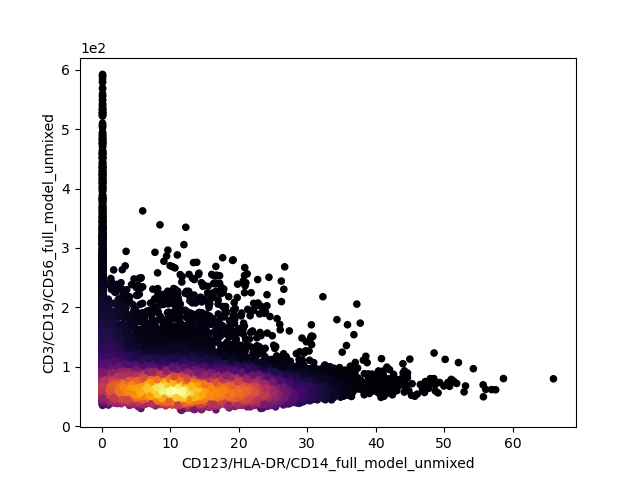

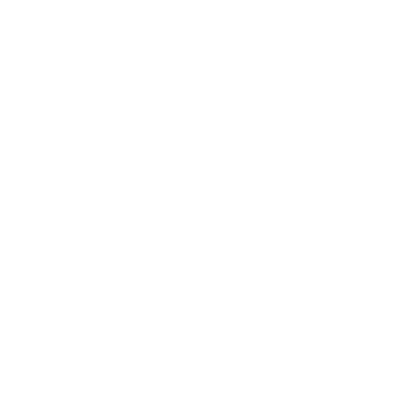

In [6]:
# channel_names = [
#     'CD45_single_antibody_model_unmixed',
#        'autofluor_single_antibody_model_unmixed',
#        'CD123_single_antibody_model_unmixed',
#        'CD19_single_antibody_model_unmixed',
#        'CD56_single_antibody_model_unmixed',
#        'CD14_single_antibody_model_unmixed',
#        'CD16_single_antibody_model_unmixed',
#        'HLA-DR_single_antibody_model_unmixed',
#        'CD3_single_antibody_model_unmixed']
channel_names = [
       'CD123/HLA-DR/CD14_full_model_unmixed',
       'CD3/CD19/CD56_full_model_unmixed', 'CD45_full_model_unmixed',
       'CD16_full_model_unmixed']

# For exporting figures
export_dir = '/home/henry/leukosight_data/figures/demixing/'
# For making image montages
read_image_fn = lambda index: bsccm.read_image(index, contrast_type='led_array', channel='DPC_Top')
# read_image_fn = lambda index: bsccm.read_image(index, contrast_type='dpc')


ScatterSelectorGating(bsccm=bsccm, channel_names=channel_names, num_cols=1, 
                  export_dir=export_dir, read_image_fn=read_image_fn)

# Show the histogram of a single marker

In [16]:
import numpy as np
marker = 'CD3'

cd3_ones = bsccm.surface_marker_dataframe[np.logical_and(bsccm.index_dataframe.antibodies == marker,
                                     bsccm.index_dataframe.batch == 0)]

t = cd3_ones['{}_single_antibody_model_unmixed'.format(marker)].to_numpy()

t = np.log(t)

range_min = np.nanpercentile(t, 0.1)
range_max = np.nanpercentile(t, 99.9)
pad = 0.15 * (range_max - range_min)
display_range = (range_min - pad / 2, range_max + pad)            
            
%matplotlib widget
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 4))
_ = plt.hist(t, 80, density=True)
ax.set_xticks(np.arange(-10, 10))

plt.xlim(display_range)
plt.xlabel('log CD3')
plt.ylabel('density')
plt.gca().set_yticklabels([])
print(display_range)

ax.grid(True)

# plt

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-1.6417186648455648, 6.780212949450382)


In [2]:
bsccm.global_metadata['led_array']['channel_names']

['Brightfield',
 'DF_50',
 'DF_50_Bottom',
 'DF_50_Right',
 'DF_55',
 'DF_60',
 'DF_60_Bottom',
 'DF_60_Right',
 'DF_65',
 'DF_70',
 'DF_70_Bottom',
 'DF_70_Right',
 'DF_75',
 'DF_80',
 'DF_80_Bottom',
 'DF_80_Right',
 'DF_85',
 'DF_90',
 'DPC_Bottom',
 'DPC_Left',
 'DPC_Right',
 'DPC_Top',
 'LED119']